In [1]:
import pandas as pd

In [2]:
wine_df = pd.read_csv("https://archive.ics.uci.edu"
                      "/ml/machine-learning-databases/wine/wine.data", 
                      header=None)

In [3]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [5]:
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine_df = wine_df[wine_df['Class label'] != 1]
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


In [7]:
X = wine_df[["Alcohol", "Hue"]].values
y = wine_df["Class label"].values

In [8]:
X.shape, y.shape

((119, 2), (119,))

In [11]:
np.unique(y)

array([2, 3])

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [14]:
train_y, test_y

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0]),
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1]))

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

In [16]:
tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [17]:
tree.score(test_X, test_y)

0.8333333333333334

In [15]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, bootstrap=True, 
                        bootstrap_features=False, random_state=1)

In [16]:
bag.fit(train_X, train_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=1),
                  n_estimators=500, random_state=1)

In [17]:
bag.score(test_X, test_y)

0.8958333333333334

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [19]:
rf.fit(train_X, train_y)

RandomForestClassifier()

In [20]:
rf.score(test_X, test_y)

0.8958333333333334

In [21]:
import numpy as np

x_min, x_max = train_X[:,0].min()-1, train_X[:,0].max()+1
y_min, y_max = train_X[:,1].min()-1, train_X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1))

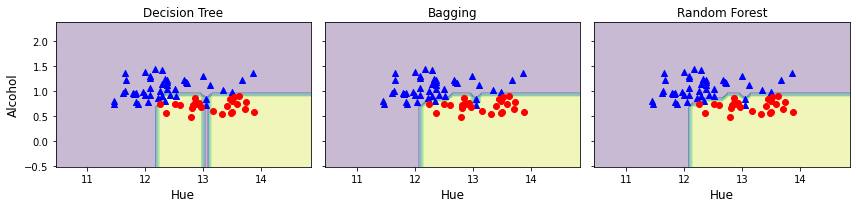

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row',
                         figsize=(12,3))

model_info = zip([0, 1, 2], 
                 [tree, bag, rf], 
                 ['Decision Tree', 'Bagging', 'Random Forest'])
for idx, model, title_txt in model_info :
    model.fit(train_X, train_y)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.3)
    axes[idx].scatter(train_X[train_y==0, 0], train_X[train_y==0, 1], 
                      c='blue', marker='^')
    axes[idx].scatter(train_X[train_y==1, 0], train_X[train_y==1, 1], 
                      c='red', marker='o')
    axes[idx].set_title(title_txt)
    axes[idx].set_xlabel('Hue', fontsize=12)
    
axes[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.show()